<a href="https://colab.research.google.com/github/RafsanJany-44/Research_5_Stages_Sleep_Classification_HMC/blob/main/RandomForest_Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from joblib import Parallel, delayed
from google.colab import files
import joblib
  

def save_model(model,model_name):
 joblib.dump(model, model_name)
  
def load_model(model_name):
  return joblib.load(model_name)

In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research_5_Stages_Sleep_Classification_HMC/main/DATA/EEG_Five_Stages_HMC.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))

In [6]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,W,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,W,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,W,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,W,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,W,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108451 entries, 0 to 108450
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sleep_Stage             108451 non-null  object 
 1   MeanP_Alpha_F4          108451 non-null  float64
 2   MedianF_Alpha_F4        108451 non-null  float64
 3   MeanF_Alpha_F4          108451 non-null  float64
 4   Spectral Edge_Alpha_F4  108451 non-null  float64
 5   PeakF_Alpha_F4          108451 non-null  float64
 6   MeanP_Beta_F4           108451 non-null  float64
 7   MedianF_Beta_F4         108451 non-null  float64
 8   MeanF_Beta_F4           108451 non-null  float64
 9   Spectral Edge_Beta_F4   108451 non-null  float64
 10  PeakF_Beta_F4           108451 non-null  float64
 11  MeanP_Theta_F4          108451 non-null  float64
 12  MedianF_Theta_F4        108451 non-null  float64
 13  MeanF_Theta_F4          108451 non-null  float64
 14  Spectral Edge_Theta_

In [8]:
set(list(dataset[target]))

{'N1', 'N2', 'N3', 'R', 'W'}

In [9]:
frequency = dataset["Sleep_Stage"].value_counts()
print(frequency)

N2    39428
N3    21290
W     19355
R     16465
N1    11913
Name: Sleep_Stage, dtype: int64


In [10]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [11]:
set(list(dataset[target])) # alphabet wise

{0, 1, 2, 3, 4}

In [12]:
frequency = dataset["Sleep_Stage"].value_counts()
print(frequency)

1    39428
2    21290
4    19355
3    16465
0    11913
Name: Sleep_Stage, dtype: int64


In [13]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [15]:
new_dataset=balance(X_test,y_test)

X_test = new_dataset.loc[:, new_dataset.columns!=target]
y_test = new_dataset[target]

In [16]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=10000
k_range = range (4500,N+1,500)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)'''

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\nfrom tqdm import tqdm\nN=10000\nk_range = range (4500,N+1,500)\nscores={}\nscores_list = []\nfor k in tqdm(k_range):\n  classifier = RandomForestClassifier(n_estimators=k,random_state=0)\n  classifier.fit(X_train, y_train)\n  y_pred=classifier.predict(X_test)\n  scores[k] = accuracy_score(y_test,y_pred)\n  scores_list.append(accuracy_score(y_test,y_pred))\n  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))\n\n\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize = (25,10))\nplt.plot(k_range,scores_list)\nplt.xlabel(\'Value of n_estimators\')\nplt.ylabel (\'Testing Accuracy\')\n\n\n\nprint("The best n_estimators:")\nbest_estimator=list(scores.keys())[scores_list.index(max(scores_list))]\nprint(best_estimator)'

  2%|▎         | 1/40 [00:03<02:33,  3.94s/it]

1/40 round completed......................... Accurecy: 0.3029780762894437


  5%|▌         | 2/40 [00:10<03:26,  5.42s/it]

2/40 round completed......................... Accurecy: 0.40732480040552527


  8%|▊         | 3/40 [00:20<04:43,  7.66s/it]

3/40 round completed......................... Accurecy: 0.500164744645799


 10%|█         | 4/40 [00:31<05:26,  9.07s/it]

4/40 round completed......................... Accurecy: 0.5388417184133824


 12%|█▎        | 5/40 [00:45<06:15, 10.74s/it]

5/40 round completed......................... Accurecy: 0.5528830313014828


 15%|█▌        | 6/40 [01:02<07:14, 12.79s/it]

6/40 round completed......................... Accurecy: 0.5712330503104803


 18%|█▊        | 7/40 [01:21<08:09, 14.82s/it]

7/40 round completed......................... Accurecy: 0.5934862501584083


 20%|██        | 8/40 [01:43<09:05, 17.04s/it]

8/40 round completed......................... Accurecy: 0.6167786085413762


 22%|██▎       | 9/40 [02:07<10:00, 19.36s/it]

9/40 round completed......................... Accurecy: 0.6375110885819287


 25%|██▌       | 10/40 [02:35<10:55, 21.86s/it]

10/40 round completed......................... Accurecy: 0.6569509567862122


 28%|██▊       | 11/40 [03:05<11:48, 24.44s/it]

11/40 round completed......................... Accurecy: 0.675199594474718


 30%|███       | 12/40 [03:38<12:38, 27.08s/it]

12/40 round completed......................... Accurecy: 0.6894690153339247


 32%|███▎      | 13/40 [04:15<13:33, 30.14s/it]

13/40 round completed......................... Accurecy: 0.7023951336966164


 35%|███▌      | 14/40 [04:54<14:12, 32.80s/it]

14/40 round completed......................... Accurecy: 0.7099987327334939


 38%|███▊      | 15/40 [05:35<14:41, 35.28s/it]

15/40 round completed......................... Accurecy: 0.7187682169560259


 40%|████      | 16/40 [06:19<15:05, 37.72s/it]

16/40 round completed......................... Accurecy: 0.7269801039158535


 42%|████▎     | 17/40 [07:04<15:20, 40.03s/it]

17/40 round completed......................... Accurecy: 0.7299201622101128


 45%|████▌     | 18/40 [07:51<15:26, 42.13s/it]

18/40 round completed......................... Accurecy: 0.7341021416803953


 48%|████▊     | 19/40 [08:40<15:24, 44.04s/it]

19/40 round completed......................... Accurecy: 0.7340514510201496


 50%|█████     | 20/40 [09:29<15:16, 45.82s/it]

20/40 round completed......................... Accurecy: 0.7391712077049803


 52%|█████▎    | 21/40 [10:20<14:58, 47.27s/it]

21/40 round completed......................... Accurecy: 0.7389937903941198


 55%|█████▌    | 22/40 [11:12<14:35, 48.63s/it]

22/40 round completed......................... Accurecy: 0.7412748701051831


 57%|█████▊    | 23/40 [12:04<14:04, 49.70s/it]

23/40 round completed......................... Accurecy: 0.741325560765429


 60%|██████    | 24/40 [12:57<13:29, 50.56s/it]

24/40 round completed......................... Accurecy: 0.7408693448232163


 62%|██████▎   | 25/40 [13:50<12:48, 51.25s/it]

25/40 round completed......................... Accurecy: 0.7420859206691167


 65%|██████▌   | 26/40 [14:43<12:06, 51.89s/it]

26/40 round completed......................... Accurecy: 0.7427702445824357


 68%|██████▊   | 27/40 [15:36<11:20, 52.37s/it]

27/40 round completed......................... Accurecy: 0.742668863261944


 70%|███████   | 28/40 [16:30<10:33, 52.75s/it]

28/40 round completed......................... Accurecy: 0.741325560765429


 72%|███████▎  | 29/40 [17:24<09:43, 53.02s/it]

29/40 round completed......................... Accurecy: 0.7407426181726017


 75%|███████▌  | 30/40 [18:17<08:51, 53.19s/it]

30/40 round completed......................... Accurecy: 0.7424914459510835


 78%|███████▊  | 31/40 [19:11<07:59, 53.31s/it]

31/40 round completed......................... Accurecy: 0.7423647193004689


 80%|████████  | 32/40 [20:05<07:07, 53.43s/it]

32/40 round completed......................... Accurecy: 0.7424914459510835


 82%|████████▎ | 33/40 [20:58<06:14, 53.51s/it]

33/40 round completed......................... Accurecy: 0.7427955899125586


 85%|████████▌ | 34/40 [21:52<05:21, 53.60s/it]

34/40 round completed......................... Accurecy: 0.7417817767076417


 88%|████████▊ | 35/40 [22:46<04:28, 53.69s/it]

35/40 round completed......................... Accurecy: 0.7435559498162464


 90%|█████████ | 36/40 [23:40<03:34, 53.71s/it]

36/40 round completed......................... Accurecy: 0.7427448992523128


 92%|█████████▎| 37/40 [24:34<02:41, 53.76s/it]

37/40 round completed......................... Accurecy: 0.7421873019896084


 95%|█████████▌| 38/40 [25:27<01:47, 53.76s/it]

38/40 round completed......................... Accurecy: 0.7434545684957546


 98%|█████████▊| 39/40 [26:21<00:53, 53.75s/it]

39/40 round completed......................... Accurecy: 0.7430743885439108


100%|██████████| 40/40 [27:15<00:00, 40.88s/it]

40/40 round completed......................... Accurecy: 0.7427955899125586
The best Depth:
35


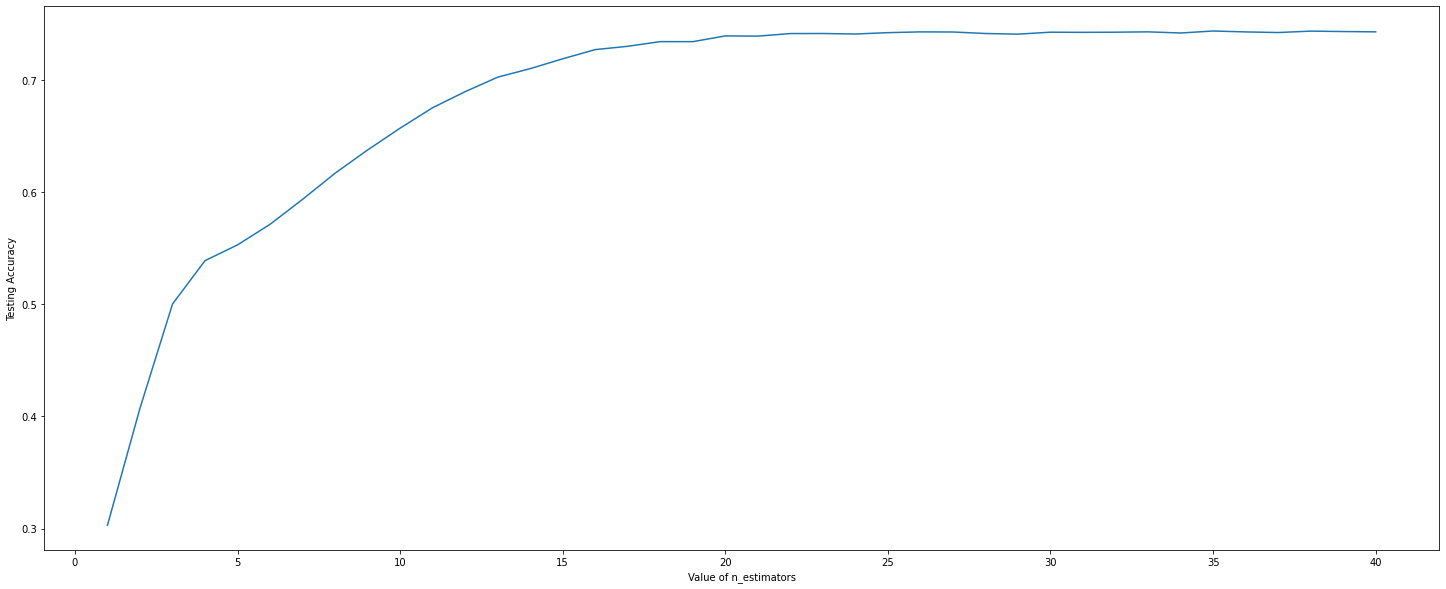

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=40
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [18]:
'''from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_estimator,"Best_est_"+str(rf_estimator))
#files.download("max_depth_"+str(rf_estimator)) '''

'from sklearn.ensemble import RandomForestClassifier\nrf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)\nrf_estimator.fit(X_train, y_train)\ny_pred=rf_estimator.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\n\nsave_model(rf_estimator,"Best_est_"+str(rf_estimator))\n#files.download("max_depth_"+str(rf_estimator)) '

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_depth,"max_depth_"+str(rf_depth))
#files.download("max_depth_"+str(rf_depth)) 

[[2536 2322   26 1202 1805]
 [ 175 6793  431  284  208]
 [  15 1418 6414    3   41]
 [ 220  977   40 6493  161]
 [ 383  324   16   67 7101]]
              precision    recall  f1-score   support

           0       0.76      0.32      0.45      7891
           1       0.57      0.86      0.69      7891
           2       0.93      0.81      0.87      7891
           3       0.81      0.82      0.81      7891
           4       0.76      0.90      0.83      7891

    accuracy                           0.74     39455
   macro avg       0.77      0.74      0.73     39455
weighted avg       0.77      0.74      0.73     39455

Accurecy:  0.7435559498162464


In [20]:
'''from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=450,max_depth=39,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

save_model(rf_all,"All_"+str(rf_all))
#files.download("max_depth_"+str(rf_all)) '''

'from sklearn.ensemble import RandomForestClassifier\nrf_all = RandomForestClassifier(n_estimators=450,max_depth=39,random_state=0)\nrf_all.fit(X_train, y_train)\ny_pred=rf_all.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred))\n\nsave_model(rf_all,"All_"+str(rf_all))\n#files.download("max_depth_"+str(rf_all)) '